In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# import decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
# You can download from: https://www.kaggle.com/c/titanic/data
df = pd.read_csv('../data/exam/processed/merged_data_with_ratings.csv')

In [2]:
# Display basic info about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              880 non-null    object 
 1   Age                     880 non-null    object 
 2   Gender                  880 non-null    object 
 3   Location                880 non-null    object 
 4   MembershipLevel         880 non-null    object 
 5   TotalPurchases          880 non-null    int64  
 6   TotalSpent              880 non-null    float64
 7   FavoriteCategory        859 non-null    object 
 8   LastPurchaseDate        879 non-null    object 
 9   WebsiteClickRate        880 non-null    float64
 10  TimeSpentOnSite         880 non-null    float64
 11  SocialMediaEngagement   880 non-null    object 
 12  AdClickHistory          808 non-null    object 
 13  GeneratedReview         878 non-null    object 
 14  CustomerSentimentScore  880 

,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4


In [3]:
# Data preprocessing
# Handle missing values
df['Gender_new'] = df['Age']
display(df.head())
# create a new column 'Age_new' and fill it with random values range from 18 to 76
df['Age_new'] = np.random.randint(18, 76, size=len(df))

# remove $sign from 'TotalSpend' and convert it to float
df['TotalSpent'] = df['TotalSpent'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# remove TotalSpend that is not a number and bfill it with the previous value
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'], errors='coerce')

<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_18824\1217612237.py:9: SyntaxWarning: invalid escape sequence '\$'
  df['TotalSpent'] = df['TotalSpent'].replace({'\$': '', ',': ''}, regex=True).astype(float)


,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment,Gender_new
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5,Female
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4,Male
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5,Other
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2,Male
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4,Female


In [4]:
# Encode categorical variables
le = LabelEncoder()
df['MembershipLevel'] = le.fit_transform(df['MembershipLevel'])
df['FavoriteCategory'] = le.fit_transform(df['FavoriteCategory'])
df['SocialMediaEngagement'] = le.fit_transform(df['SocialMediaEngagement'])
df['AdClickHistory'] = le.fit_transform(df['AdClickHistory'])
df['PersonaTag'] = le.fit_transform(df['PersonaTag'])
df['Gender_new'] = le.fit_transform(df['Gender_new'])

# Select features for the model
features = [
    'Age_new', 'Gender_new', 'MembershipLevel', 'TotalPurchases',
    'TotalSpent', 'FavoriteCategory', 'SocialMediaEngagement',
    'TimeSpentOnSite', 'WebsiteClickRate', 'AdClickHistory',
    'CustomerSentimentScore', 'PersonaTag', 'llm_sentiment'
]
X = df[features]
y = df['Churn']

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Train the logistic regression model
lr_model = DecisionTreeClassifier(random_state=42, max_depth=5)
lr_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [8]:
# Make predictions
y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

In [9]:
# Model evaluation
print("\n=== MODEL EVALUATION ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== MODEL EVALUATION ===
Accuracy: 0.9091
ROC AUC Score: 0.9426

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        99
           1       0.90      0.90      0.90        77

    accuracy                           0.91       176
   macro avg       0.91      0.91      0.91       176
weighted avg       0.91      0.91      0.91       176



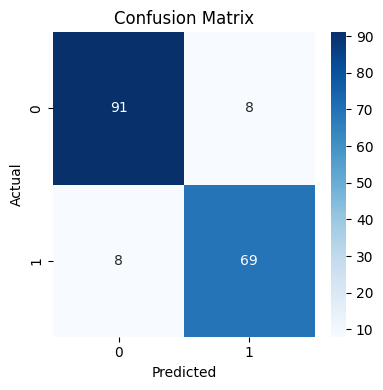

In [10]:
# Confusion Matrix
plt.figure(figsize=(4, 4))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('../images/decision_tree_confusion_matrix.png')

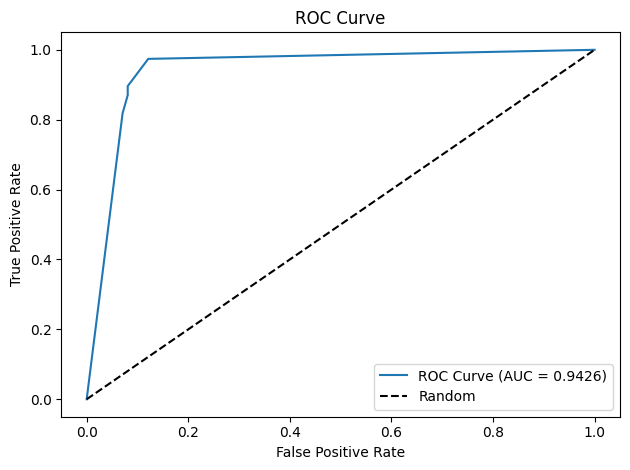

In [11]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.savefig('../images/decision_tree_model_roc.png')

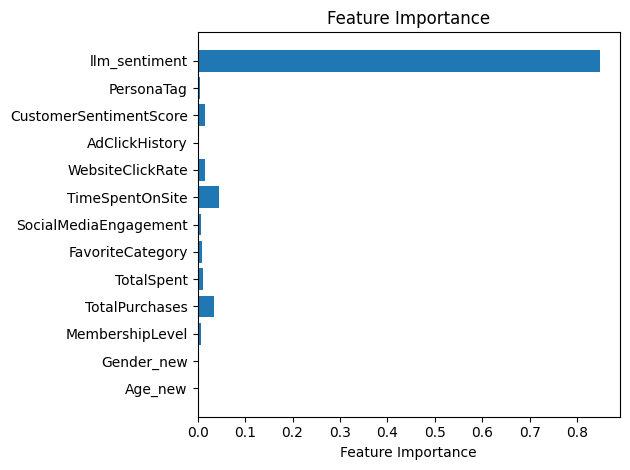

In [12]:
# Feature importance
feature_importance = lr_model.feature_importances_
feature_names = features
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')

plt.tight_layout()
plt.savefig('../images/decision_tree_model_feature.png')

In [13]:
# Additional evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score

print("\n=== ADDITIONAL METRICS ===")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")


=== ADDITIONAL METRICS ===
Precision: 0.8961
Recall: 0.8961
F1-Score: 0.8961


In [14]:
# Cross-validation for more robust evaluation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Feature importance interpretation (Decision Tree uses feature importance, not coefficients)
print("\n=== FEATURE IMPORTANCE ===")
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': lr_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(importance_df)


Cross-validation scores: [0.95744681 0.95744681 0.97163121 0.96453901 0.93571429]
Mean CV accuracy: 0.9574 (+/- 0.0241)

=== FEATURE IMPORTANCE ===
                   Feature  Importance
12           llm_sentiment    0.847780
7          TimeSpentOnSite    0.044831
3           TotalPurchases    0.034173
10  CustomerSentimentScore    0.016341
8         WebsiteClickRate    0.015175
4               TotalSpent    0.011350
5         FavoriteCategory    0.009238
6    SocialMediaEngagement    0.007190
2          MembershipLevel    0.007095
11              PersonaTag    0.005493
0                  Age_new    0.001334
1               Gender_new    0.000000
9           AdClickHistory    0.000000


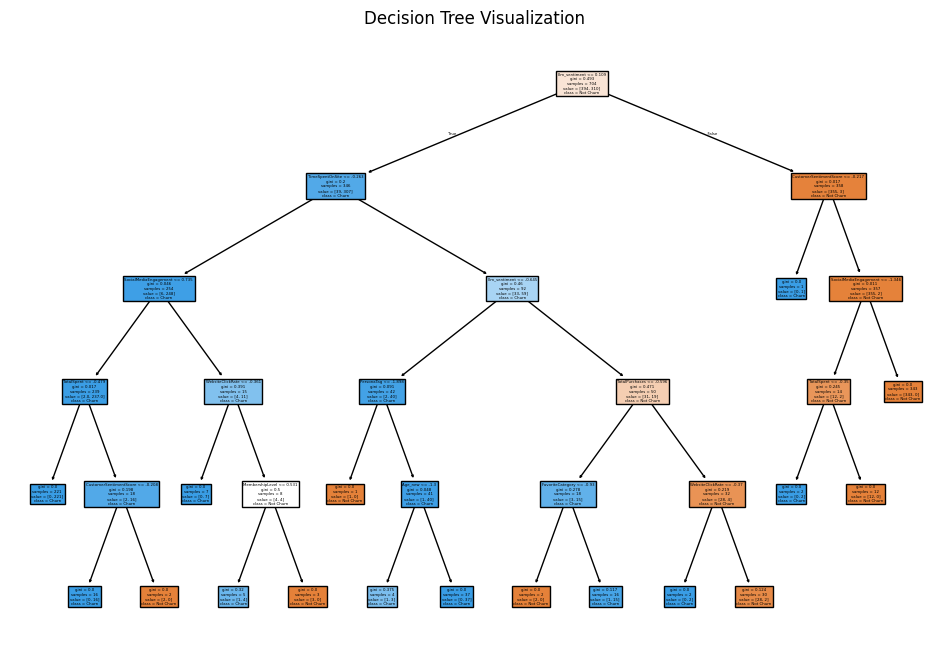

In [15]:
# plot the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(lr_model, feature_names=features, class_names=['Not Churn', 'Churn'], filled=True)
plt.title('Decision Tree Visualization')
plt.savefig('../images/decision_tree.png')